In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
om = np.exp(1j*2*np.pi/3)

phi_2 = np.array([1, om, om**2,
                  -1, -om, om**2,
                 -1, om, -om**2,
                 1, -om, -om**2])

phi_3 = np.array([1, om**2, om,
                  -1, -om**2, om,
                 -1, om**2, -om,
                 1, -om**2, -om])

alpha = np.exp(-1j*2*np.pi/3)
def H(qx, qy, qz):
    arr = np.array([[qx*qy*qz,                             qx**2 + alpha**qy**2 + alpha**2*qz**2],
                    [qx**2  +alpha**2*qy**2 + alpha*qz**2, -qx*qy*qz]])
    return arr

c = 0.2 # correct me
r0 = np.array([c, c, c])
r1 = np.array([-c+.5, -c, c+.5])
r2 = np.array([-c, c+.5, -c+.5])
r3 = np.array([c+.5, -c+.5, -c])

rall = [r0, r1, r2, r3]

def get_psi(q):
    e, v = np.linalg.eig(H(q, q, q))
    psi = phi_2*v[0, 0] + phi_3*v[1, 0] 
    return psi.reshape(3, 4, order='F').T

In [3]:
is2 = 1/np.sqrt(2)
is3 = 1/np.sqrt(3)
M = np.array([[-is2, is2, is3],
              [is2, -is2, is3],
              [0, 0, is3]])

np.dot(np.array([1, 1, 1])*is3, M)

array([0., 0., 1.])

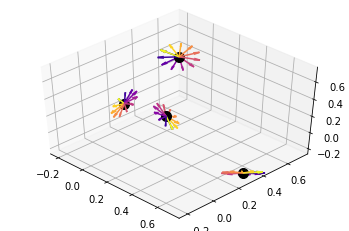

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

n = 12
phases = np.linspace(0, 1, n)*2*np.pi
colors = plt.cm.plasma(np.linspace(0, 1, n))
for phase, color in zip(phases, colors):
    for r, v in zip(rall, get_psi(1)):
        v *= np.exp(1j*phase)
        v = v.real
        ax.quiver(r[0], r[1], r[2], v[0], v[1], v[2], color=color, length=0.1)

ax.view_init(elev=45, azim=-45)

for r in rall:
    ax.scatter([r[0]], [r[1]], [r[2]], color='k', marker='o',
              s=100)

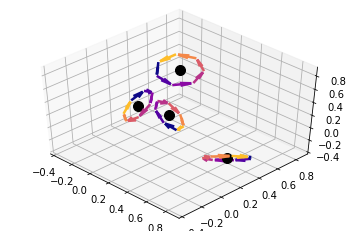

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

n = 8 # number of arrows
phases = np.linspace(0, 1, n)*2*np.pi
colors = plt.cm.plasma(np.linspace(0, 1, n))

radius = .15
l = 0.9

positions = []
for phase in phases:
    position_set = []
    for r, v in zip(rall, get_psi(1)):
        v *= np.exp(1j*phase)
        position_set.append(r + v.real*radius)

    positions.append(position_set)

for i, color in zip(range(n - 1), colors):
    set_i = positions[i]
    set_f = positions[i + 1]
    for ri, rf in zip(set_i, set_f):
        v0 = rf[0] - ri[0]
        v1 = rf[1] - ri[1]
        v2 = rf[2] - ri[2]
        ax.quiver(ri[0], ri[1], ri[2],
                  v0*l, v1*l, v2*l,
                  color=color,
                 arrow_length_ratio=.6,
                 linewidth=2.5)
        
        
for r in rall:
    ax.scatter([r[0]], [r[1]], [r[2]], color='k', marker='o',
              s=100)

ax.view_init(elev=45, azim=-45)
